<a href="https://colab.research.google.com/github/AyeshaAreej/Python-Practice-Course/blob/main/PandasPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import drive

In [54]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
path='/content/drive/MyDrive/Colab Notebooks/datasets/IRIS.csv'

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer

In [57]:
data=pd.read_csv(path)
#if excel file
#df=pd.read_excel(path)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [59]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [60]:
data1=data["sepal_length"]
print(data1)
#Or
#data.sepal_length


0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64


**Slicing Data**

In [61]:
data[0:3]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [62]:
#Selecting last element in list 
#Slice starts at last element and ends at end of list
data[-1:]

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,Iris-virginica


In [63]:
#iloc[row slicing,column slicing]
#list 3 rows and 4 columns
#data.iloc[0:3,1:4]
#1st 3 records and all columns
data.iloc[0:3,0:]
#Select all columns for rows of index values 0 and 10
#data.iloc[[0,10],:]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


**Filtering Data**

In [64]:
#Using an array index with boolean expressions
data_filtered=data[(data.sepal_length>=5.0) &
(data.petal_length >=5.0)]
print(data_filtered)
print(data_filtered.shape)

     sepal_length  sepal_width  petal_length  petal_width          species
77            6.7          3.0           5.0          1.7  Iris-versicolor
83            6.0          2.7           5.1          1.6  Iris-versicolor
100           6.3          3.3           6.0          2.5   Iris-virginica
101           5.8          2.7           5.1          1.9   Iris-virginica
102           7.1          3.0           5.9          2.1   Iris-virginica
103           6.3          2.9           5.6          1.8   Iris-virginica
104           6.5          3.0           5.8          2.2   Iris-virginica
105           7.6          3.0           6.6          2.1   Iris-virginica
107           7.3          2.9           6.3          1.8   Iris-virginica
108           6.7          2.5           5.8          1.8   Iris-virginica
109           7.2          3.6           6.1          2.5   Iris-virginica
110           6.5          3.2           5.1          2.0   Iris-virginica
111           6.4        

**Missing Values**

In [65]:
#Checking for missing values
data.isnull() # Returns a boolean matrix, if the value is NaN then True otherwise False

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [66]:
data.isnull().sum() #Return column name along with number of Nan values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [85]:
#Droping Missing Values
#axis=0 for removing rows having missing values and 1 for removing columns
#how='all' remove only if all values of a row or columns are Nan 
#thresh=5  then the rows having less than 5 realvalues will be dropped.
# subset=[‘C’]: we have 4 columns A,B,C and D then if we specify subset=[‘C’] then only the rows that have their C value as NaN will be removed.
#inplace— By default no changes will be made to your dataframe. So if you want these changes to reflect onto your dataframe then you need to use inplace = True

#data.dropna()
data.dropna(inplace=True,axis=0,how='any',thresh=1,subset=['petal_length'])


**Joinng Data**

In [94]:
#We can join, merge, and concat dataframe using different methods
# df.concat(),df.merge(),df.join()
#Concatinating

df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],'B': ['B0', 'B1', 'B2', 'B3'], 'C': ['C0', 'C1', 'C2', 'C3'], 'D': ['D0', 'D1', 'D2', 'D3']},index = [0, 1, 2, 3])

#Creating second dataframe
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],'B': ['B4', 'B5', 'B6', 'B7'], 'C': ['C4', 'C5', 'C6', 'C7'], 'D': ['D4', 'D5', 'D6', 'D7']}, index = [4, 5, 6, 7])

# Concatenating the dataframes
pd.concat([df1, df2]) 




,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [96]:
# Merging the dataframes
left = pd.DataFrame({'Key': ['K0', 'K1', 'K2', 'K3'], 'A': ['A0', 'A1', 'A2', 'A3'],'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'Key': ['K0', 'K1', 'K2', 'K3'], 'C': ['C0', 'C1', 'C2', 'C3'],'D': ['D0', 'D1', 'D2', 'D3']}) 
pd.merge(left, right, how ='inner', on ='Key') 

,Key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [105]:
import numpy as np
#Agreggate Data:Dataframe.aggregate() function is used to apply some aggregation across one or more column.
df = pd.DataFrame({'A':[1, 2, 3],'B':[4, 5, 6],'C':[7, 8, 9],'D': [np.nan, np.nan, np.nan]})

#Aggregate these functions over the rows.
df.agg(['sum', 'min'])

#Different aggregations per column
df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

#Aggregate over the columns.
df.agg("sum", axis="columns")


0    12.0
1    15.0
2    18.0
dtype: float64

In [68]:
#A data frames columns can be queried with a boolean expression.
#Every frame has the module query() as one of its objectsmembers.
data_filtered =data.query('sepal_length>5.0')
print(data_filtered)
print(data_filtered.shape)


     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
14            5.8          4.0           1.2          0.2     Iris-setosa
15            5.7          4.4           1.5          0.4     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[118 rows x 5 columns]
(118, 5)


In [69]:
#Selecting species and plot columns from dataframe
print(data[["sepal_length","sepal_width"]])
#Fliping the order
#print(data[["sepal_width","sepal_length"]])

     sepal_length  sepal_width
0             5.1          3.5
1             4.9          3.0
2             4.7          3.2
3             4.6          3.1
4             5.0          3.6
..            ...          ...
145           6.7          3.0
146           6.3          2.5
147           6.5          3.0
148           6.2          3.4
149           5.9          3.0

[150 rows x 2 columns]


In [70]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [71]:
rows, col = data.shape
print("Rows : %s, column : %s" % (rows, col))

Rows : 150, column : 5


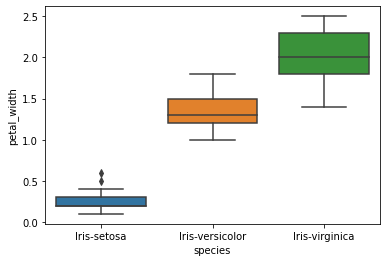

In [72]:
sns.boxplot(x='species',y="petal_width",data=data)

In [73]:
x = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

**Data Spliting**

In [74]:


X = StandardScaler().fit_transform(x)
Y = LabelBinarizer().fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=150)

**Linear Regression Model**